Accuracy:  0.8002244668911336
[[474  75]
 [103 239]]


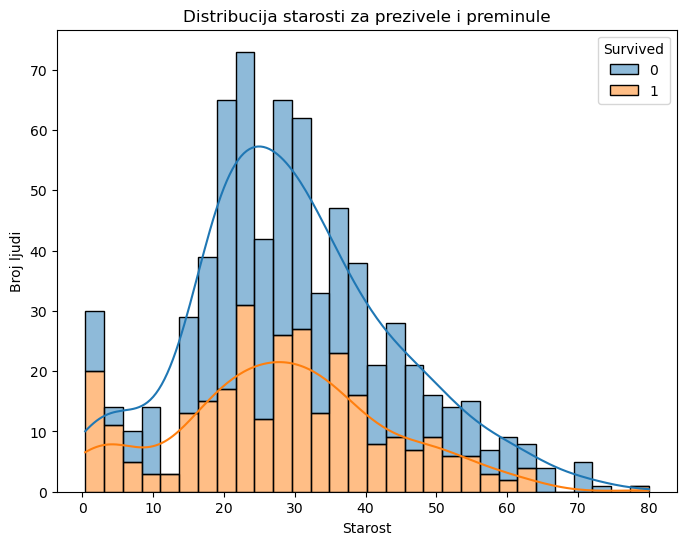

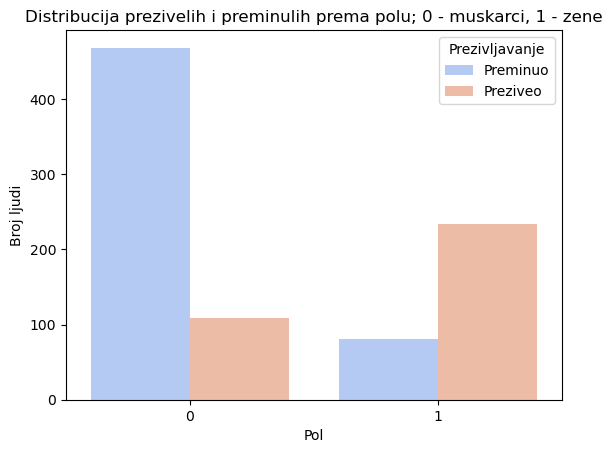

In [21]:
import pandas as pd #manipulacija i analiza podataka
import numpy as np #rad sa nizovima, matricama, statistikom
import matplotlib.pyplot as plt #vizuelizacija
import seaborn as sns #vizuelizacija, heat mape, distribucije
from sklearn.model_selection import train_test_split #funkcija train_test_split se koristi za podelu podataka na trening i test
from sklearn.linear_model import LogisticRegression #logisticku regresiju, model masinskog ucenja, koristimo za predvidjanje kategorijske varijable
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc #ucitavanje metrika koje se koriste za evaluaciju modela
from sklearn.impute import SimpleImputer #funkcija koja popunjava NaN vrednosti medijanom, modom ili srednjom vrednoscu
from IPython.display import display, HTML

#Učitavanje podataka
train_data = pd.read_csv(r'C:\Users\Korisnik\Desktop\train.csv')
test_data = pd.read_csv(r'C:\Users\Korisnik\Desktop\test.csv')

#Pretvaram kategoricke promenljive u numeričke
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Biramo relevantne karakteristike za model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x_train = train_data[features]
y_train = train_data['Survived']
x_test = test_data[features]

#Koristi SimpleImputer za popunjavanje NaN vrednosti
imputer = SimpleImputer(strategy='median') 

#Popunjavanje NaN vrednosti u trening i test skupovima
x_train = imputer.fit_transform(x_train)  # Fit + transform na trening set
x_test = imputer.transform(x_test)  # Samo transform na test set (ne fituj ponovo!)

#Kreiranje modela logističke regresije
model = LogisticRegression(max_iter=200)

#Obuka modela sa trening podacima
model.fit(x_train, y_train)

#Predikcija na test skupu
y_pred = model.predict(x_test)

#Rezultati (predikcija preživljavanja)
test_data['Survived'] = y_pred

#Izvoz rezultata u CSV
test_data[['PassengerId', 'Survived']].to_csv(r'C:\Users\Korisnik\Desktop\titanic_predictions.csv', index=False)

y_val_pred = model.predict(x_train)

#Evaluacija modela
print("Accuracy: ", accuracy_score(y_train, y_val_pred))

print(confusion_matrix(y_train, y_val_pred))

#Vizuelizacija rezultata
plt.figure(figsize = (8,6))
sns.histplot(data = train_data, x = 'Age', hue = 'Survived', multiple = "stack", bins = 30, kde = True) 
plt.title('Distribucija starosti za prezivele i preminule')
plt.xlabel('Starost')
plt.ylabel('Broj ljudi')
plt.show()

sns.countplot(data = train_data, x = 'Sex', hue = 'Survived', palette = 'coolwarm')
plt.title('Distribucija prezivelih i preminulih prema polu; 0 - muskarci, 1 - zene')
plt.xlabel('Pol')
plt.ylabel('Broj ljudi')
plt.legend(title = 'Prezivljavanje', labels = ['Preminuo', 'Preziveo'])
plt.show()
